In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pulp

In [4]:
from scipy.optimize import linprog

In [44]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],  # Red constraint left side
            [-4,  5],  # Blue constraint left side
            [ 1, -2]]  # Yellow constraint left side

rhs_ineq = [20,# Red constraint right side
            10, # Blue constraint right side
             2] # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

In [45]:
bnd = [(0, float("inf")),  # Bounds of x
       (0, float("inf"))]  # Bounds of y

In [46]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               bounds=bnd,
               method="revised simplex")

# IN CASE there are equalities, then the point maybe is not in one vertice

#opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
#               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
#               method="revised simplex")

opt

C:\Users\camil\AppData\Local\Temp\ipykernel_29692\1026653514.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,


     con: array([], dtype=float64)
     fun: -20.714285714285715
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.        , 0.        , 9.85714286])
  status: 0
 success: True
       x: array([6.42857143, 7.14285714])

In [47]:
opt.fun

-20.714285714285715

In [48]:
opt.x

array([6.42857143, 7.14285714])

In [49]:
opt.success

True

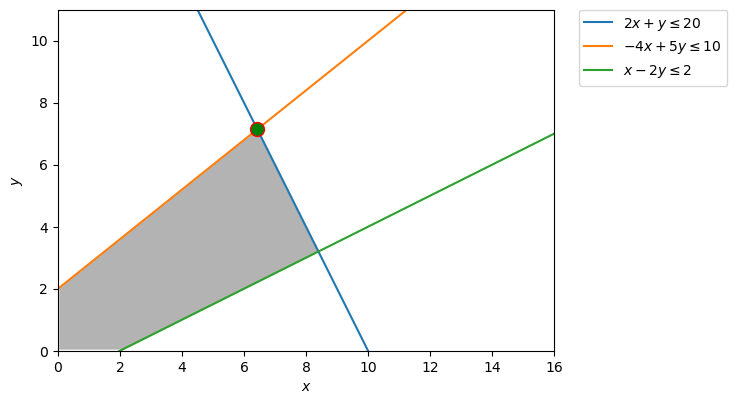

In [50]:
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*x+y<=20) & (-4*x + 5*y<=10) & (x-2*y<=2) & (x>=0) & (y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)

x = np.linspace(0, 16, 2000)
y1 = 20 - 2*x
y2 = (10+4*x)/5.0
y3 = (x-2)/2.0


#plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y1, label=r'$2x+y\leq20$')
plt.plot(x, y2, label=r'$-4x+5y\leq10$')
plt.plot(x, y3, label=r'$x-2y\leq2$')

# also, we can plot the optimal point
a1 = opt.x[0]
a2 = opt.x[1]
plt.plot(a1, a2, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")


plt.xlim(0,16)
plt.ylim(0,11)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()